# Exploratory Data Analysis for Car Price Prediction

This notebook performs exploratory data analysis on car sales advertisements data to prepare for building a prediction model for car prices.

## 1. Setup and Data Loading

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

# Set plot styling
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("viridis")
warnings.filterwarnings("ignore")

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)

In [3]:
# Load the dataset
df = pd.read_csv("data/sales_ads_train.csv")

# Display basic information
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (135397, 25)


,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Rodzaj_paliwa,Emisja_CO2,Naped,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie
0,1,13900,PLN,Used,Renault,Grand Espace,Gr 2.0T 16V Expression,NaN,2005.0,213000.0,170.0,1998.0,Gasoline,232.0,Front wheels,Manual,minivan,5.0,blue,NaN,NaN,NaN,28/04/2021,"SŁONECZNA 1 - 99-300 Kutno, kutnowski, Łódzkie...","['ABS', 'Electric front windows', 'Drivers air..."
1,2,25900,PLN,Used,Renault,Megane,1.6 16V 110,III (2008-2016),2010.0,117089.0,110.0,1598.0,Gasoline,159.0,Front wheels,Manual,station_wagon,5.0,silver,NaN,NaN,16/06/2010,04/05/2021,"ul. Wiosenna 8 - 41-407 Imielin, Centrum (Polska)","['ABS', 'Electric front windows', 'Drivers air..."
2,3,35900,PLN,Used,Opel,Zafira,Tourer 1.6 CDTI ecoFLEX Start/Stop,C (2011-2019),2015.0,115600.0,136.0,1598.0,NaN,NaN,NaN,Manual,minivan,5.0,white,Denmark,NaN,NaN,03/05/2021,"Sianów, koszaliński, Zachodniopomorskie","['ABS', 'Electric front windows', 'Passengers ..."
3,4,5999,PLN,Used,Ford,Focus,1.6 TDCi FX Silver / Silver X,Mk2 (2004-2011),2007.0,218000.0,90.0,1560.0,Diesel,118.0,Front wheels,Manual,compact,5.0,blue,NaN,NaN,27/11/2007,02/05/2021,"Gdańsk, Pomorskie, Przymorze Wielkie","['ABS', 'Electric front windows', 'Drivers air..."
4,5,44800,PLN,Used,Toyota,Avensis,1.8,III (2009-),2013.0,NaN,NaN,1798.0,Gasoline,152.0,Front wheels,Manual,NaN,4.0,other,Poland,Yes,20/05/2013,02/05/2021,"Świdnik, świdnicki, Lubelskie","['ABS', 'Electric front windows', 'Drivers air..."


## 2. Data Overview and Structure

In [ ]:
# Check column data types
df.info()

In [ ]:
# Statistical summary of numerical features
df.describe().T

In [61]:
# Distribution of categorical features
cat_columns = df.select_dtypes(include=["object"]).columns

for col in cat_columns[:5]:  # Display first 5 categorical columns
    print(f"\n{col} - {df[col].nunique()} unique values")
    print(df[col].value_counts().head())


Waluta - 2 unique values
Waluta
PLN    131856
EUR       165
Name: count, dtype: int64

Stan - 2 unique values
Stan
Used    115824
New      16251
Name: count, dtype: int64

Marka_pojazdu - 102 unique values
Marka_pojazdu
Volkswagen    11692
BMW           10749
Audi          10724
Opel          10366
Ford          10223
Name: count, dtype: int64

Model_pojazdu - 1139 unique values
Model_pojazdu
Astra      3331
A4         2958
Seria 3    2941
Golf       2625
Passat     2573
Name: count, dtype: int64

Wersja_pojazdu - 16014 unique values
Wersja_pojazdu
2.0 TDI              596
1.6                  540
Standard             418
1.2                  392
2.0 TDCi Titanium    390
Name: count, dtype: int64


## 3. Target Variable Analysis (Price)

In [ ]:
# Basic statistics of price
print(df["Cena"].describe())

# Visualize price distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df["Cena"], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df["Cena"]), kde=True)
plt.title("Log-transformed Price Distribution")
plt.xlabel("Log(Price+1)")

plt.tight_layout()
plt.show()

In [ ]:
# Price distribution by currency
plt.figure(figsize=(10, 6))
sns.boxplot(x="Waluta", y="Cena", data=df)
plt.title("Price Distribution by Currency")
plt.yscale("log")
plt.grid(True, alpha=0.3)
plt.show()

## 4. Missing Values Analysis

In [ ]:
# Check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df) * 100).round(2)
missing_df = pd.DataFrame(
    {"Missing Values": missing_values, "Percentage": missing_percent}
)
missing_df = missing_df[missing_df["Missing Values"] > 0]
missing_df

In [ ]:
# Visualize missing values patterns
plt.figure(figsize=(12, 8))
msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show()

## 5. Numerical Features Analysis

In [ ]:
# Select numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols = [col for col in num_cols if col != "ID"]

# Correlation matrix
plt.figure(figsize=(14, 10))
correlation = df[num_cols].corr()
mask = np.triu(correlation)
sns.heatmap(
    correlation, annot=True, fmt=".2f", cmap="coolwarm", mask=mask, linewidths=0.5
)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

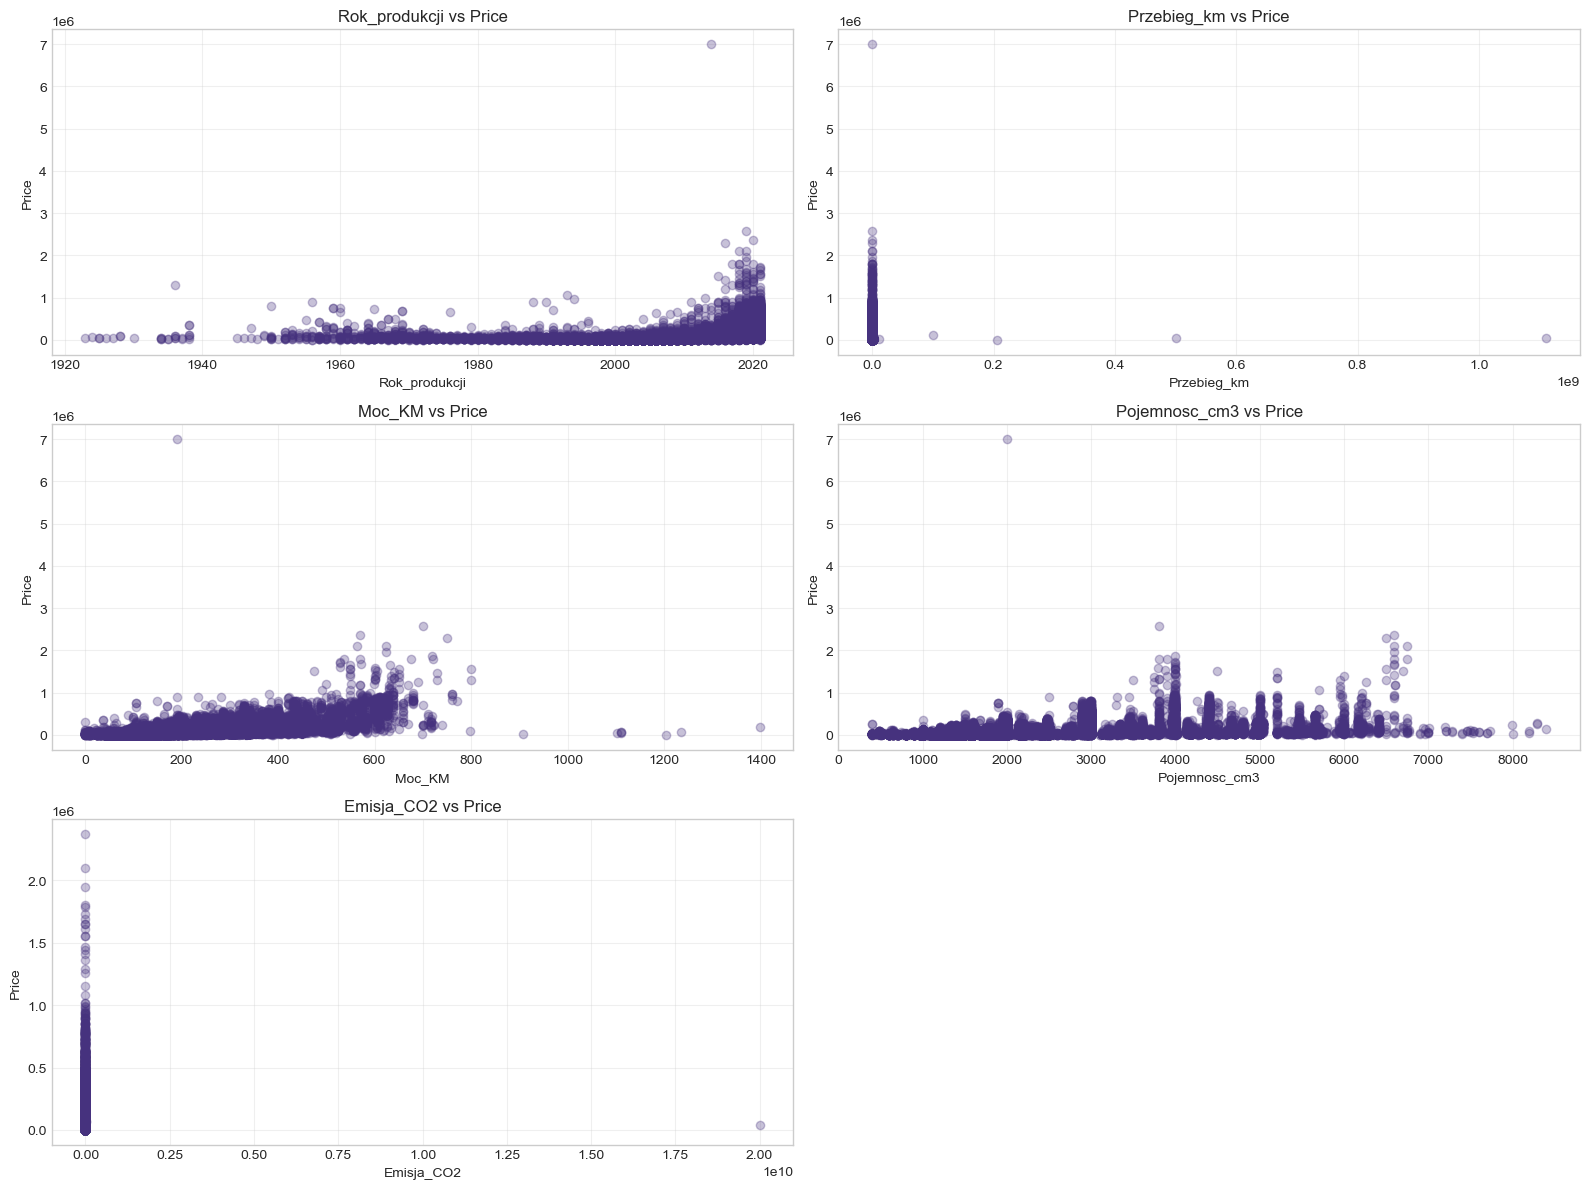

In [4]:
# Relationship between key numerical features and price
key_features = ["Rok_produkcji", "Przebieg_km", "Moc_KM", "Pojemnosc_cm3", "Emisja_CO2"]

plt.figure(figsize=(16, 12))
for i, feature in enumerate(key_features):
    plt.subplot(3, 2, i + 1)
    plt.scatter(df[feature], df["Cena"], alpha=0.3)
    plt.title(f"{feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Categorical Features Analysis

In [ ]:
# Top car brands by average price
brand_price = df.groupby("Marka_pojazdu")["Cena"].agg(["mean", "count"])
brand_price = brand_price[brand_price["count"] > 100].sort_values(
    "mean", ascending=False
)

plt.figure(figsize=(14, 8))
sns.barplot(x=brand_price.index[:15], y="mean", data=brand_price[:15])
plt.title("Top 15 Car Brands by Average Price")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Price distribution by car body type
plt.figure(figsize=(14, 8))
sns.boxplot(x="Typ_nadwozia", y="Cena", data=df)
plt.title("Price Distribution by Car Body Type")
plt.xlabel("Body Type")
plt.ylabel("Price")
plt.yscale("log")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Price distribution by fuel type
plt.figure(figsize=(14, 8))
sns.boxplot(x="Rodzaj_paliwa", y="Cena", data=df)
plt.title("Price Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.yscale("log")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

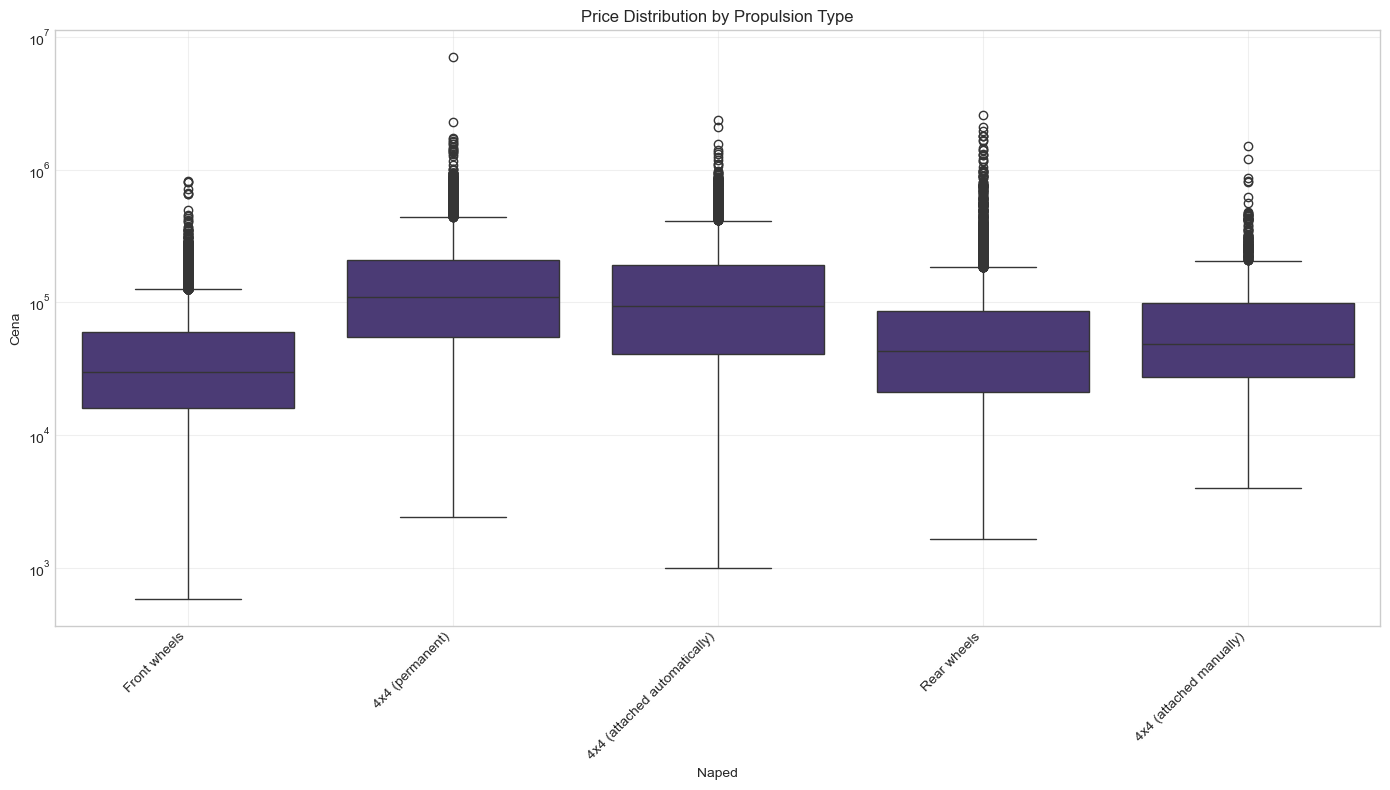

In [5]:
# Price distribution by propulsion type
plt.figure(figsize=(14, 8))
sns.boxplot(x="Naped", y="Cena", data=df)
plt.title("Price Distribution by Propulsion Type")
plt.yscale("log")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

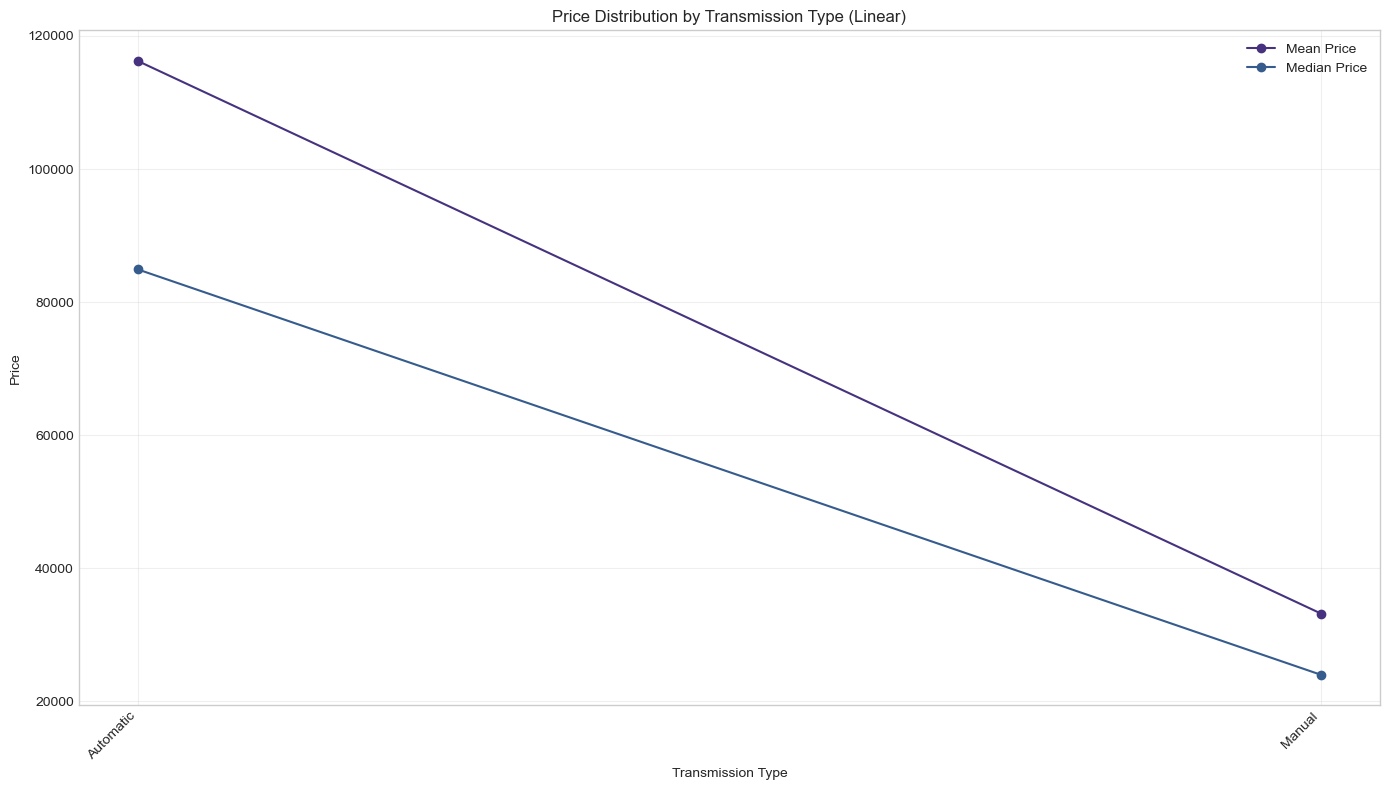

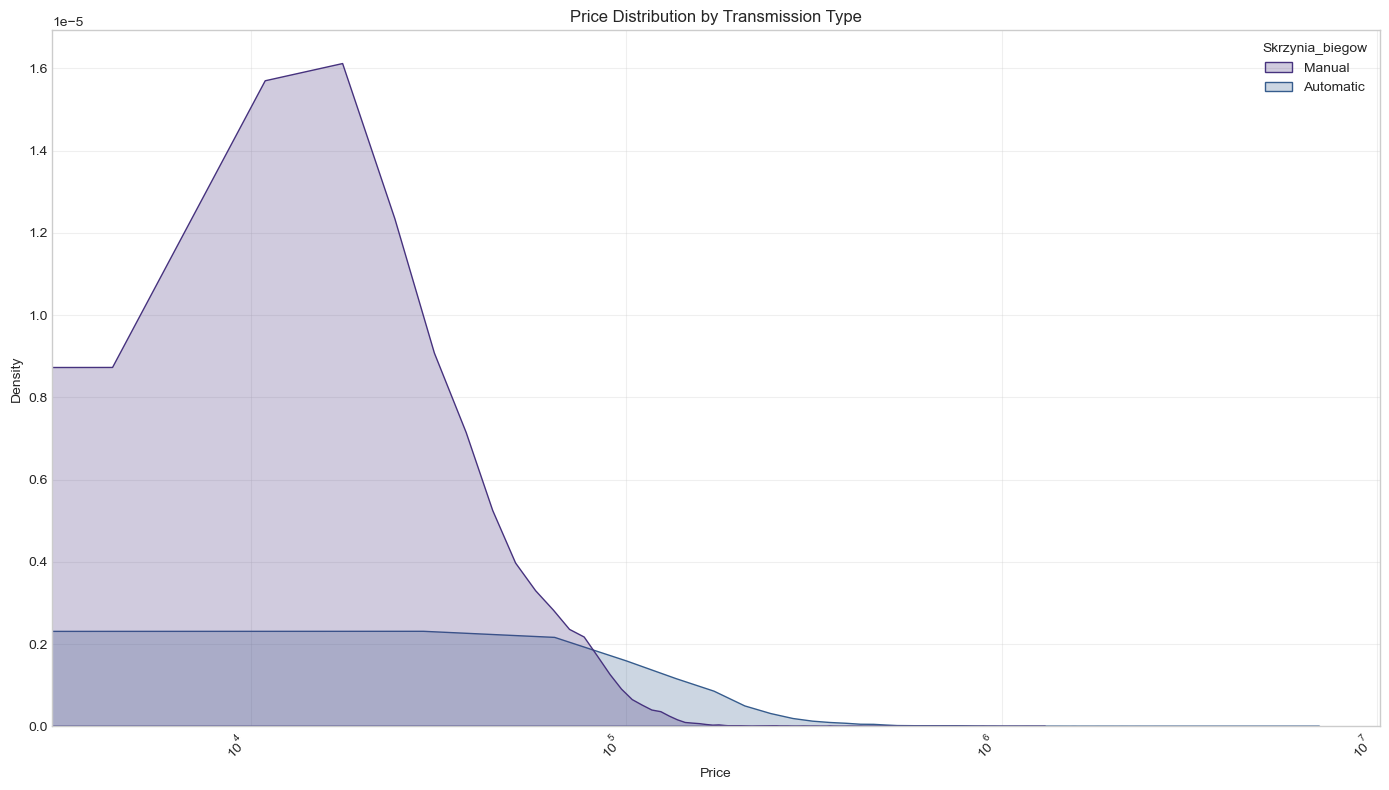

In [16]:
price_stats = (
    df.groupby("Skrzynia_biegow")["Cena"].agg(["mean", "median"]).reset_index()
)

# Sort by transmission type (if necessary)
price_stats.sort_values("Skrzynia_biegow", inplace=True)

plt.figure(figsize=(14, 8))
plt.plot(
    price_stats["Skrzynia_biegow"], price_stats["mean"], marker="o", label="Mean Price"
)
plt.plot(
    price_stats["Skrzynia_biegow"],
    price_stats["median"],
    marker="o",
    label="Median Price",
)
plt.title("Price Distribution by Transmission Type (Linear)")
plt.xlabel("Transmission Type")
plt.ylabel("Price")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.kdeplot(data=df, x="Cena", hue="Skrzynia_biegow", fill=True)
plt.title("Price Distribution by Transmission Type")
plt.xscale("log", base=10)
plt.xlabel("Price")
plt.ylabel("Density")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

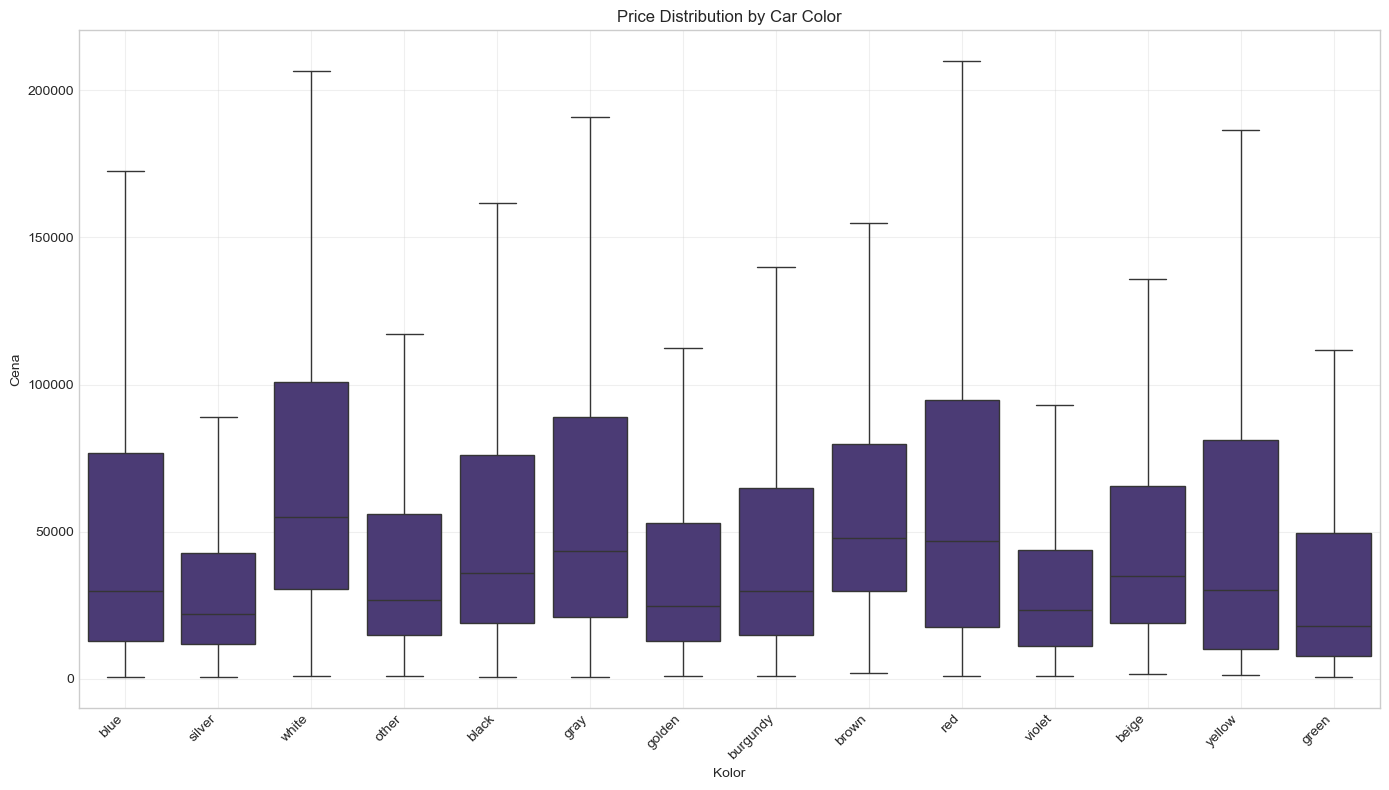

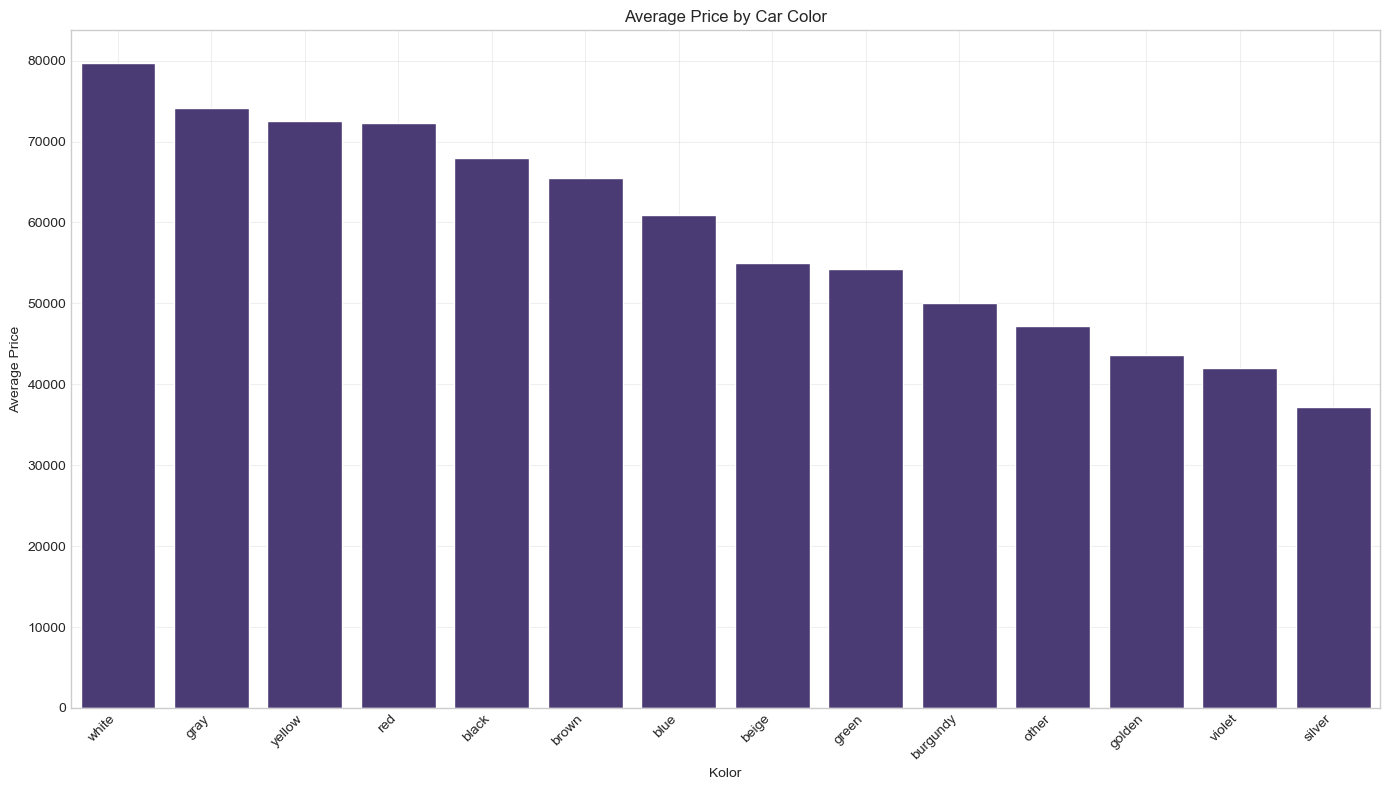

In [11]:
# Price distribution by color
plt.figure(figsize=(14, 8))
sns.boxplot(x=df["Kolor"], y=df["Cena"], showfliers=False)
plt.title("Price Distribution by Car Color")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Kolor")
plt.ylabel("Cena")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Average price per color
avg_price_per_color = df.groupby("Kolor")["Cena"].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x=avg_price_per_color.index, y=avg_price_per_color.values)
plt.title("Average Price by Car Color")
plt.xlabel("Kolor")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

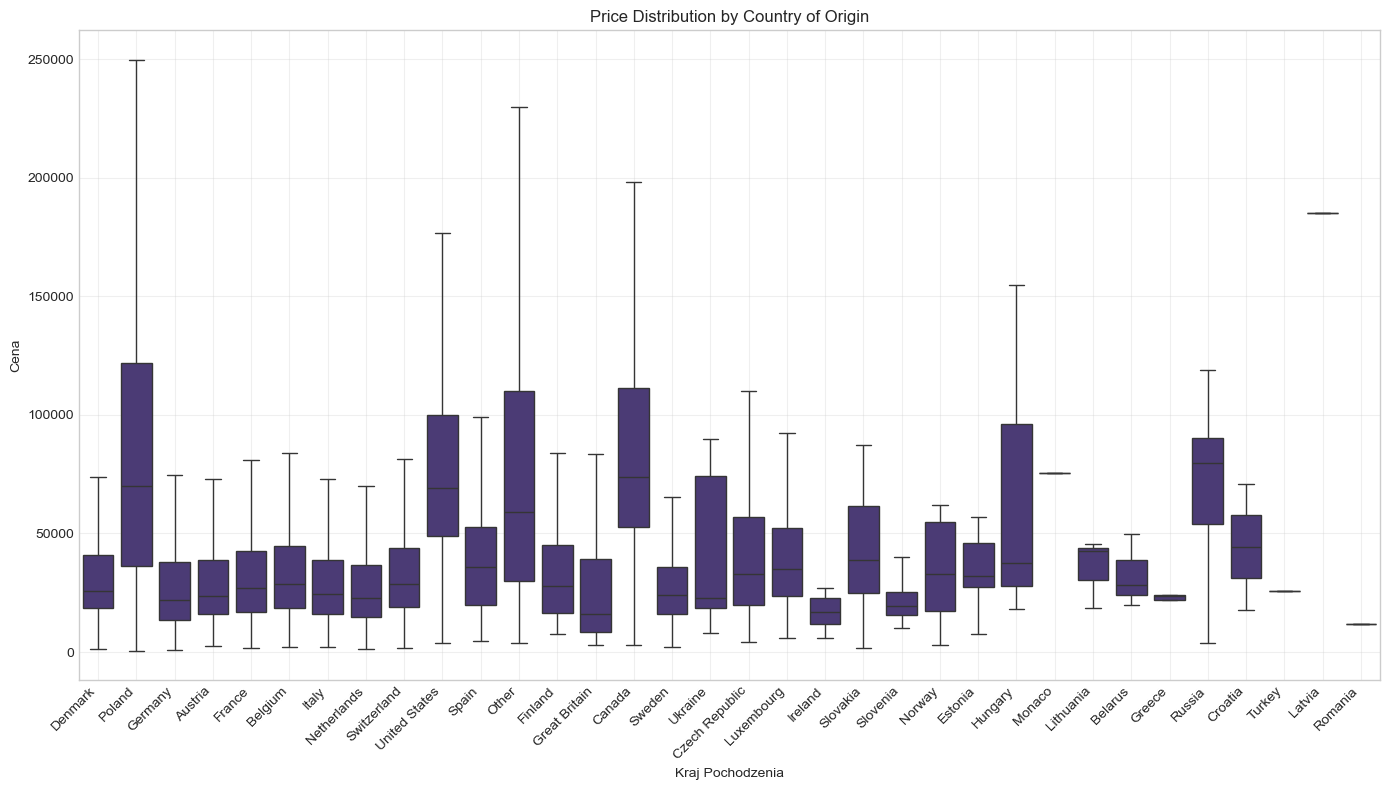

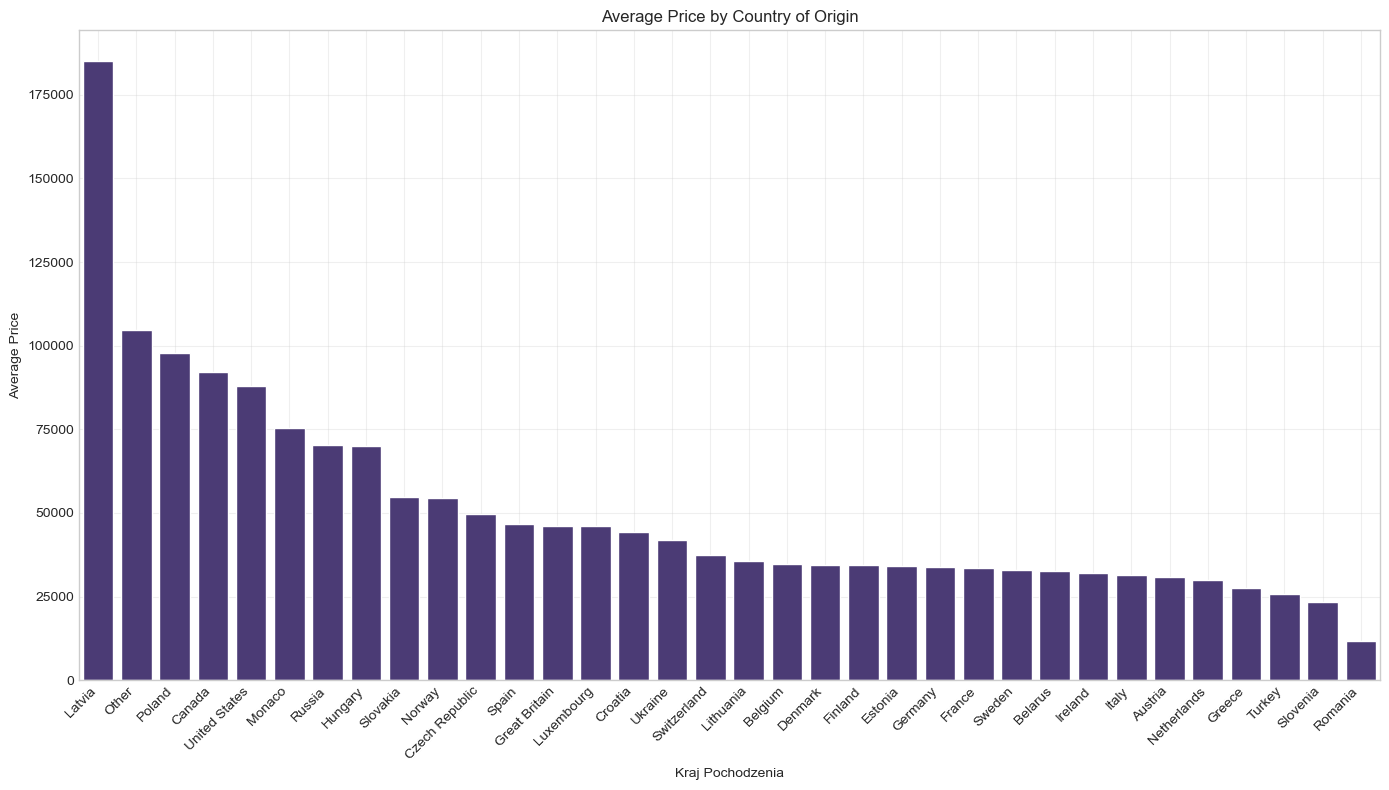

In [17]:
# Price distribution by country of origin
plt.figure(figsize=(14, 8))
sns.boxplot(x=df["Kraj_pochodzenia"], y=df["Cena"], showfliers=False)
plt.title("Price Distribution by Country of Origin")
plt.xlabel("Kraj Pochodzenia")
plt.ylabel("Cena")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Average price per country of origin
avg_price_per_country = (
    df.groupby("Kraj_pochodzenia")["Cena"].mean().sort_values(ascending=False)
)
plt.figure(figsize=(14, 8))
sns.barplot(x=avg_price_per_country.index, y=avg_price_per_country.values)
plt.title("Average Price by Country of Origin")
plt.xlabel("Kraj Pochodzenia")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

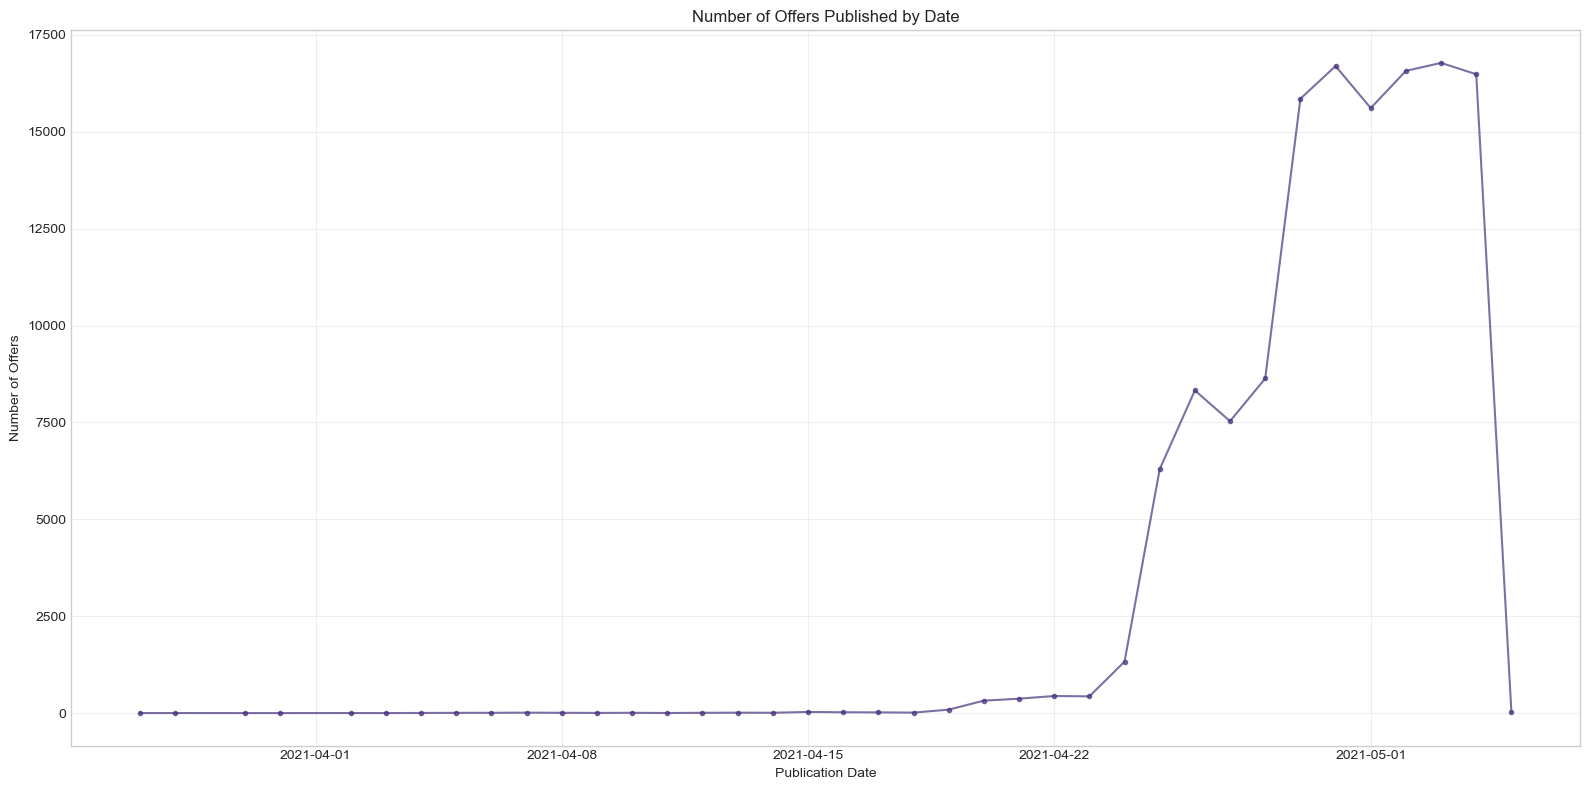

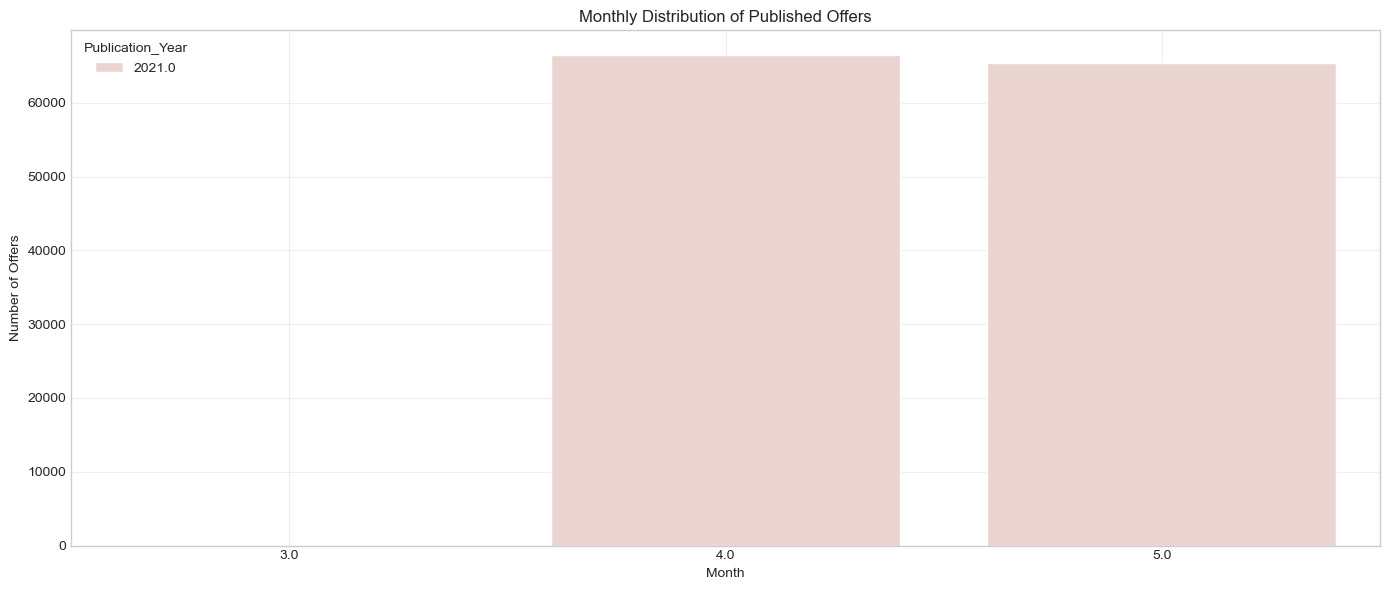

In [21]:
### Date features analysis
# Analyzing offer publication dates
# Convert Data_publikacji_oferty to datetime
df["Data_publikacji_oferty"] = pd.to_datetime(
    df["Data_publikacji_oferty"], dayfirst=True, errors="coerce"
)

# Extract date components
df["Publication_Month"] = df["Data_publikacji_oferty"].dt.month
df["Publication_Year"] = df["Data_publikacji_oferty"].dt.year

# Count offers by publication date
date_counts = df["Data_publikacji_oferty"].dt.date.value_counts().sort_index()

# Plot the distribution of offers by publication date
plt.figure(figsize=(16, 8))
date_counts.plot(kind="line", marker=".", alpha=0.7)
plt.title("Number of Offers Published by Date")
plt.xlabel("Publication Date")
plt.ylabel("Number of Offers")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Monthly distribution
plt.figure(figsize=(14, 6))
monthly_counts = (
    df.groupby(["Publication_Year", "Publication_Month"])
    .size()
    .reset_index(name="count")
)
sns.barplot(
    x="Publication_Month", y="count", hue="Publication_Year", data=monthly_counts
)
plt.title("Monthly Distribution of Published Offers")
plt.xlabel("Month")
plt.ylabel("Number of Offers")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Feature Engineering Exploration

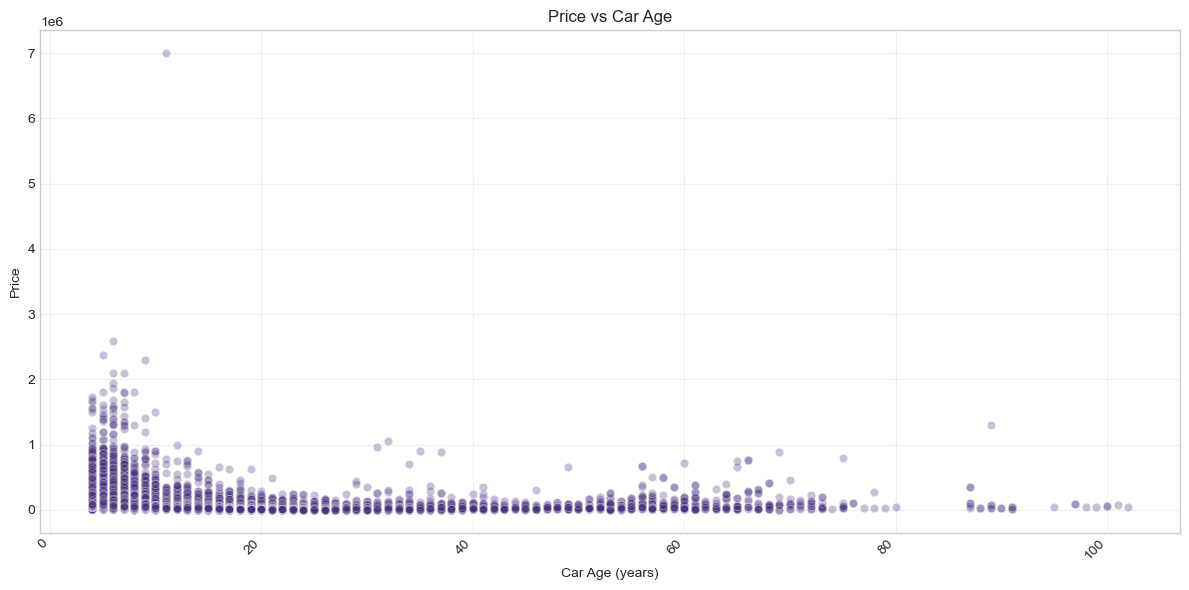

In [22]:
# Create age feature
current_year = pd.to_datetime("today").year
df["car_age"] = current_year - df["Rok_produkcji"]

# Explore price vs car age relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(x="car_age", y="Cena", data=df, alpha=0.3)
plt.title("Price vs Car Age")
plt.xlabel("Car Age (years)")
plt.ylabel("Price")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

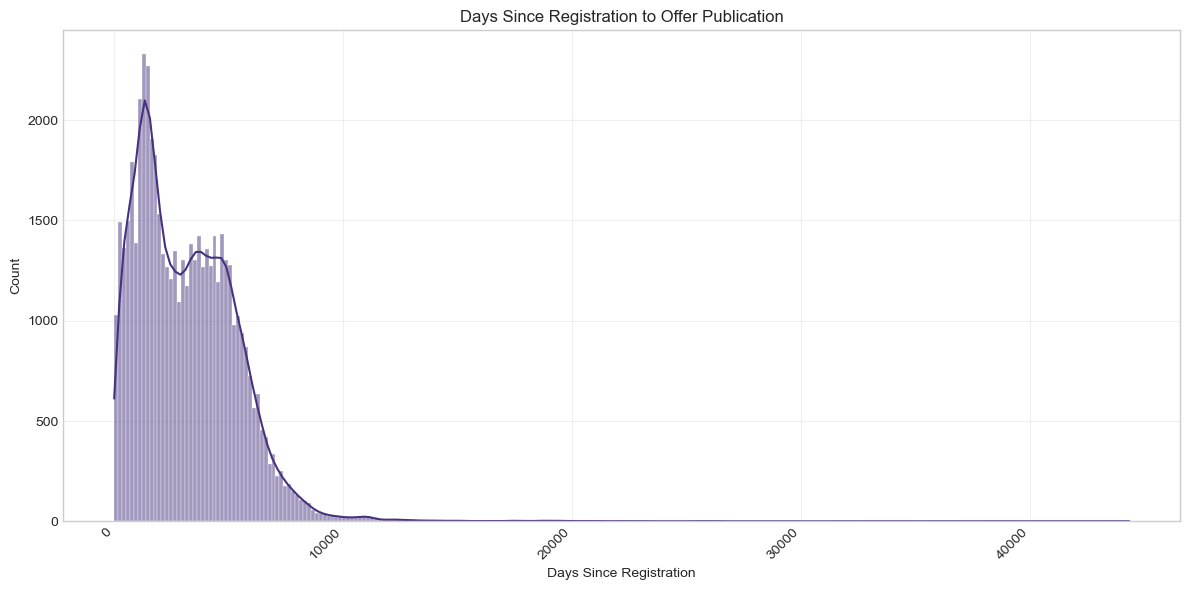

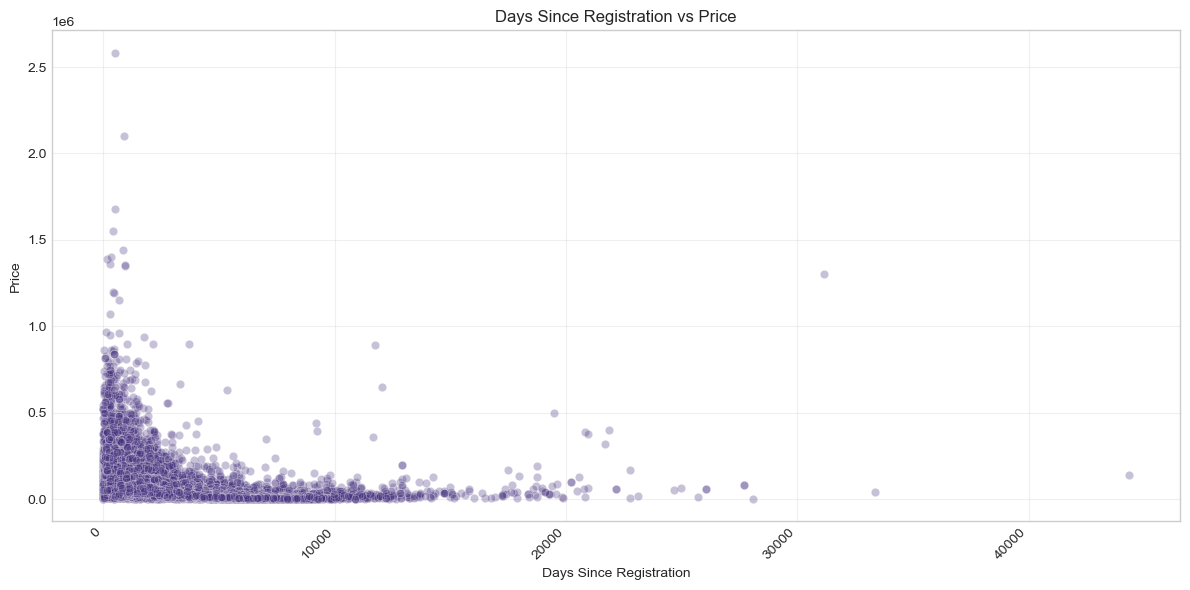

Correlation between days_since_registration and Price: -0.4380594003430376


In [18]:
# Convert date columns to datetime format
df["Data_pierwszej_rejestracji"] = pd.to_datetime(
    df["Data_pierwszej_rejestracji"], errors="coerce"
)
df["Data_publikacji_oferty"] = pd.to_datetime(
    df["Data_publikacji_oferty"], errors="coerce"
)

# Calculate difference between publication and registration dates in days
df["days_since_registration"] = (
    df["Data_publikacji_oferty"] - df["Data_pierwszej_rejestracji"]
).dt.days

# Clip negative values to 0
df["days_since_registration"] = df["days_since_registration"].clip(lower=0)

# Distribution of days_since_registration
plt.figure(figsize=(12, 6))
sns.histplot(df["days_since_registration"].dropna(), kde=True)
plt.title("Days Since Registration to Offer Publication")
plt.xlabel("Days Since Registration")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Relationship between days_since_registration and Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x="days_since_registration", y="Cena", data=df, alpha=0.3)
plt.title("Days Since Registration vs Price")
plt.xlabel("Days Since Registration")
plt.ylabel("Price")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

correlation = df[["days_since_registration", "Cena"]].corr().iloc[0, 1]
print("Correlation between days_since_registration and Price:", correlation)

In [ ]:
# Extract equipment features
# First check if Wyposazenie is in string format and contains lists
if df["Wyposazenie"].dtype == "object" and df["Wyposazenie"].str.contains("\[").any():
    # Convert string representation of lists to actual lists
    try:
        df["equipment_list"] = df["Wyposazenie"].apply(
            lambda x: eval(x) if isinstance(x, str) else []
        )

        # Count equipment features
        df["equipment_count"] = df["equipment_list"].apply(len)

        # Plot distribution of equipment count
        plt.figure(figsize=(12, 6))
        sns.histplot(df["equipment_count"], bins=30, kde=True)
        plt.title("Distribution of Equipment Features Count")
        plt.xlabel("Number of Equipment Features")
        plt.grid(True, alpha=0.3)
        plt.show()

        # Relationship between equipment count and price
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x="equipment_count", y="Cena", data=df, alpha=0.3)
        plt.title("Price vs Equipment Features Count")
        plt.xlabel("Number of Equipment Features")
        plt.ylabel("Price")
        plt.grid(True, alpha=0.3)
        plt.show()
    except Exception as e:
        print("Could not parse equipment list. Error:", e)
else:
    print("Equipment column not in expected format.")

## 8. Outlier Detection and Analysis

In [ ]:
# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


# Detect price outliers
price_outliers = detect_outliers(df, "Cena")
print(f"Number of price outliers: {len(price_outliers)}")
print(f"Percentage of price outliers: {len(price_outliers) / len(df) * 100:.2f}%")

# Display some statistics about outliers
if len(price_outliers) > 0:
    print("\nPrice outliers statistics:")
    print(price_outliers["Cena"].describe())

## 9. Data Preparation for Modeling

In [ ]:
# Create a copy of the dataframe for preprocessing
df_prep = df.copy()

# List of potentially important features for price prediction
features = [
    "Marka_pojazdu",
    "Model_pojazdu",
    "Rok_produkcji",
    "Przebieg_km",
    "Moc_KM",
    "Pojemnosc_cm3",
    "Rodzaj_paliwa",
    "Naped",
    "Skrzynia_biegow",
    "Typ_nadwozia",
    "Stan",
    "car_age",
]

# Check which features from our list are available
available_features = [f for f in features if f in df_prep.columns]
print(f"Available features for modeling: {available_features}")

In [ ]:
# Convert currency if needed
if "Waluta" in df_prep.columns:
    # Check unique currencies
    print(f"Unique currencies: {df_prep['Waluta'].unique()}")

    # Note: For a real model, we would need to normalize all prices to a single currency
    # using appropriate exchange rates. For this EDA, we'll just note the currencies.

## 10. Key Findings and Insights

**Key findings from the EDA:**

1. **Price Distribution**: The target variable distribution and whether log transformation would be beneficial
2. **Missing Values**: Patterns and strategies for handling missing values
3. **Important Correlations**: Numerical features most correlated with price
4. **Categorical Impact**: Which categorical features have the strongest relationship with price
5. **Feature Engineering**: Effectiveness of engineered features like car age and equipment count
6. **Outliers**: Presence and potential impact of outliers on the model
7. **Currency**: Drop EURO rows

## 11. Next Steps for Modeling

**Recommended next steps for building a price prediction model:**

1. **Data Preprocessing**:
   - Handle missing values based on patterns observed
   - Encode categorical variables appropriately
   - Consider scaling/normalizing numerical features
   - Implement feature engineering ideas (car age, equipment count, etc.)
   - Drop EURO from the dataset
   - Drop the dates( because all the offers published in 04-05 of the 2021)
   - Drop the equipment
   - Drop location of the poland
   - Drop electric cars
   - Drop LPG

2. **Feature Selection**:
   - Use correlation analysis and feature importance to select relevant predictors
   - Consider dimensionality reduction for high-cardinality features

3. **Model Selection**:
   - Try regression models (Linear Regression, Ridge, Lasso)
   - Ensemble methods (Random Forest, Gradient Boosting)
   - Consider advanced models like XGBoost, LightGBM

4. **Evaluation Strategy**:
   - Cross-validation approach
   - Metrics to use (RMSE, MAE, R²)
   - Baseline model to compare against

## 12. What to do if prediction is not that great

**Features that we can add to the dataset later**
*df["Usage_Rate"] = df["Przebieg"] / df["Wiek"]*



## 13. Iterations

**First:**

*Kilometers, car age, horse power, volume of the engine, number of doors*